<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from google.colab import files
uploaded = files.upload()

Saving coloradoRiver.txt to coloradoRiver.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

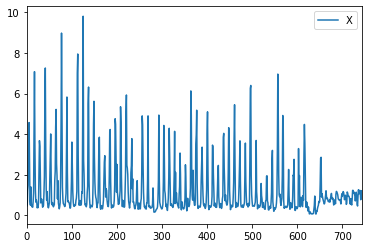

In [23]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [25]:
len(data)

744

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

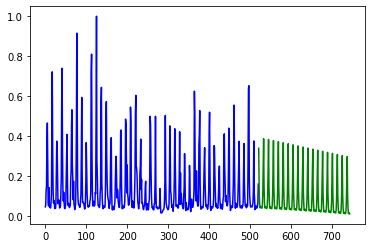

In [27]:
# Load/split the data
train, test = train_test_split(data_n, train_size=521)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:521], train, c='blue')
plt.plot(x[521:], forecasts, c='green')
plt.show()

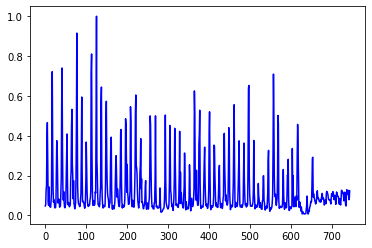

In [28]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [30]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.007725567191693673


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [32]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); AIC=1540.831, BIC=1574.877, Fit time=5.128 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=2394.869, BIC=2403.381, Fit time=0.023 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=1707.319, BIC=1724.342, Fit time=1.048 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=1923.009, BIC=1940.032, Fit time=0.641 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=3234.531, BIC=3238.787, Fit time=0.015 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 12); AIC=1759.973, BIC=1789.764, Fit time=2.232 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 0, 12); AIC=1702.342, BIC=1732.132, Fit time=3.898 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 12); AIC=1542.820, BIC=1581.122, Fit time=12.689 seconds
Near non-invertible roots for order (2, 0, 2)(2, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of 

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [33]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(223)
    print(forecasts)

[0.64103976 0.62814997 0.65068221 0.77285709 0.86744136 0.87926904
 0.74218533 0.65529678 0.57482326 0.63468598 0.66311804 0.63197511
 0.73142135 0.71526532 0.73867518 0.87325462 0.97671773 0.98837306
 0.83529732 0.73803962 0.64803245 0.71383587 0.74477457 0.70983725
 0.81934049 0.80111485 0.82661211 0.9745758  1.08803921 1.10056018
 0.9320456  0.82477967 0.72539885 0.79784472 0.83182136 0.79324381
 0.91370161 0.89357897 0.92155491 1.0840188  1.20838308 1.22204843
 1.03719115 0.91931952 0.80995724 0.88965182 0.92698657 0.88455394
 1.01689841 0.99478815 1.02549218 1.20365326 1.33981827 1.35476071
 1.15230383 1.02299527 0.90284864 0.99041107 1.03139707 0.98480514
 1.13002634 1.10577769 1.13944304 1.33457942 1.48349237 1.49982118
 1.27836763 1.13669719 1.00487838 1.10096463 1.14590534 1.09481457
 1.25396852 1.22741008 1.26427916 1.47775406 1.64042172 1.65824702
 1.41629714 1.26127082 1.11682595 1.22213544 1.27135292 1.21539803
 1.38961129 1.36055818 1.4008883  1.6341545  1.81164819 1.8310

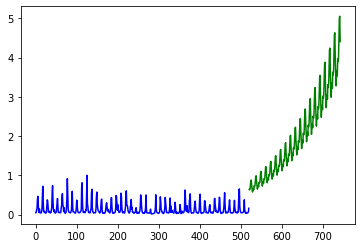

In [34]:
x = np.arange(data_n.shape[0])
plt.plot(x[:521], train, c='blue')
plt.plot(x[521:], forecasts, c='green')
plt.show()

In [35]:
mse = mean_squared_error(forecasts, test)
print(mse)

4.7802203816792845
